# `0020`

[![Commits since latest release][gh-image]][gh-link]

[gh-link]: https://github.com/claudioperez/elle-0002/compare/v0.0.0...master
[gh-image]: https://img.shields.io/github/commits-since/claudioperez/elle-0002/v0.0.0?style=social

In [1]:
import anon
# anon.conf.config.update('jax_disable_jit', True)
anon.conf.config.update("jax_enable_x64", True)
import anabel.backend as anp
import anabel as em

import elle.sections
import elle.beam2d
geom_template = elle.beam2d.transform_no2(elle.beam2d.geom_no1)
beam_template = elle.beam2d.resp_no1

An `Assembler` is an object with an `.assemble()` and optionally a `.compose()` method

In [2]:
# Create a model Assembler
model = em.SkeletalModel(ndm=2,ndf=3)

# Define problem parameters
ColumnArea  = model.param("ColumnArea")
GirderArea  = model.param("GirderArea")
P1 = model.param("P1")

# Define model components
column_section = {"A": ColumnArea, "E":, "I": 30**4/12}
girder_section = {"A": GirderArea, "E":, "I": 34_383.8}
basic_girder  = beam_template(**girder_section, E=GirderE)
basic_column  = beam_template(**column_section, E=ColumnE)

girder = geom_template(basic_girder)
column = geom_template(basic_column)

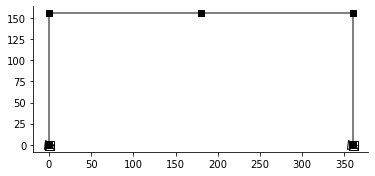

In [3]:
# Set up nodes
ft = 12
B, H = 30.*ft, 13.*ft
model.node("1",  0.,  0.)
model.node("2",  0.,  H )
model.node("3", B/2,  H )
model.node("4",  B ,  H )
model.node("5",  B ,  0.)

model.beam("a", "1", "2", **column_section, elem=column)
model.beam("b", "2", "3", **girder_section, elem=girder)
model.beam("c", "3", "4", **girder_section, elem=girder)
model.beam("d", "4", "5", **column_section, elem=column)

model.boun("1", [1,1,1])
model.boun("5", [1,1,1])

model.load("2",   P1, dof="x")
model.load("2", -2.0, dof="y")
model.load("4", -2.0, dof="y")

em.plot_skeletal(model);

In [4]:
f = model.compose()

In [5]:
U = f(3600.,3600.,1e3)
U

DeviceArray([[ 1.52848857],
             [ 0.00583992],
             [-0.01110097],
             [ 1.49259297],
             [-0.02807216],
             [ 0.0053456 ],
             [ 1.45669737],
             [-0.00603251],
             [-0.01047929]], dtype=float64)

In [6]:
for i,u in enumerate(anp.array([[ 1.52848857],
                                [ 0.00583992],
                                [-0.01110097],
                                [ 1.49259297],
                                [-0.02807216],
                                [ 0.0053456 ],
                                [ 1.45669737],
                                [-0.00603251],
                                [-0.01047929]])):
    assert abs(U[i] - u) < 1e-7

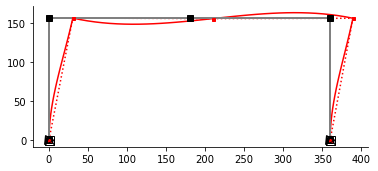

In [7]:
fig, ax = em.plot_displ(model, f(3600,3600,2e3),scale=1e1)
fig.savefig("/home/claudio/prnt/ms-thesis/doc/img/frame.svg")

In [8]:
df = anon.diff.jacfwd(f, None, (0,1),squeeze=False)

In [9]:
df(29e6,29e6,20e3)

(DeviceArray([[-8.69522599e-11],
              [-7.26154452e-13],
              [ 3.97452570e-13],
              [-8.69086396e-11],
              [-2.03656535e-13],
              [-1.93805278e-13],
              [-8.68650194e-11],
              [ 7.26978867e-13],
              [ 4.01987431e-13]], dtype=float64),
 DeviceArray([[-4.39052633e-11],
              [ 2.18353505e-13],
              [ 5.52927845e-13],
              [-4.08757761e-11],
              [ 2.59914899e-12],
              [-2.63843818e-13],
              [-3.78462889e-11],
              [-2.18353505e-13],
              [ 4.95168978e-13]], dtype=float64))